In [ ]:
import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
price1999 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resale-flat-prices-based-on-approval-date-1990-1999.csv')
price2012 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
price2014 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
price2016 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
price2017 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')
cpi = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CPI.csv')

price1999.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            31.0        IMPROVED                 1977          9000  
1            31.0        IMPROVED                 1977          6000  
2            31.0        IMPROVED                 1977          8000  
3            31.0        IMPROVED                 1977          6000  
4            73.0  NEW GENERATION                 1976         47200

In [ ]:
price2012.head()


month        town flat_type block       street_name storey_range  \
0  2000-01  ANG MO KIO    3 ROOM   170  ANG MO KIO AVE 4     07 TO 09   
1  2000-01  ANG MO KIO    3 ROOM   174  ANG MO KIO AVE 4     04 TO 06   
2  2000-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     07 TO 09   
3  2000-01  ANG MO KIO    3 ROOM   215  ANG MO KIO AVE 1     07 TO 09   
4  2000-01  ANG MO KIO    3 ROOM   218  ANG MO KIO AVE 1     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            69.0        Improved                 1986      147000.0  
1            61.0        Improved                 1986      144000.0  
2            73.0  New Generation                 1976      159000.0  
3            73.0  New Generation                 1976      167000.0  
4            67.0  New Generation                 1976      163000.0

In [ ]:
price2014.head()


month        town flat_type block        street_name storey_range  \
0  2012-03  ANG MO KIO    2 ROOM   172   ANG MO KIO AVE 4     06 TO 10   
1  2012-03  ANG MO KIO    2 ROOM   510   ANG MO KIO AVE 8     01 TO 05   
2  2012-03  ANG MO KIO    3 ROOM   610   ANG MO KIO AVE 4     06 TO 10   
3  2012-03  ANG MO KIO    3 ROOM   474  ANG MO KIO AVE 10     01 TO 05   
4  2012-03  ANG MO KIO    3 ROOM   604   ANG MO KIO AVE 5     06 TO 10   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  
0            45.0        Improved                 1986      250000.0  
1            44.0        Improved                 1980      265000.0  
2            68.0  New Generation                 1980      315000.0  
3            67.0  New Generation                 1984      320000.0  
4            67.0  New Generation                 1980      321000.0

In [ ]:
price2016.head()

month        town flat_type block        street_name storey_range  \
0  2015-01  ANG MO KIO    3 ROOM   174   ANG MO KIO AVE 4     07 TO 09   
1  2015-01  ANG MO KIO    3 ROOM   541  ANG MO KIO AVE 10     01 TO 03   
2  2015-01  ANG MO KIO    3 ROOM   163   ANG MO KIO AVE 4     01 TO 03   
3  2015-01  ANG MO KIO    3 ROOM   446  ANG MO KIO AVE 10     01 TO 03   
4  2015-01  ANG MO KIO    3 ROOM   557  ANG MO KIO AVE 10     07 TO 09   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            60.0        Improved                 1986               70   
1            68.0  New Generation                 1981               65   
2            69.0  New Generation                 1980               64   
3            68.0  New Generation                 1979               63   
4            68.0  New Generation                 1980               64   

   resale_price  
0      255000.0  
1      275000.0  
2      285000.0  
3      290000.0  
4      290000.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                826581 non-null  datetime64[ns]
 1   town                 826581 non-null  object        
 2   flat_type            826581 non-null  object        
 3   block                826581 non-null  object        
 4   street_name          826581 non-null  object        
 5   storey_range         826581 non-null  object        
 6   floor_area_sqm       826581 non-null  float64       
 7   flat_model           826581 non-null  object        
 8   lease_commence_date  826581 non-null  int64         
 9   resale_price         826581 non-null  float64       
 10  remaining_lease      117527 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 69.4+ MB


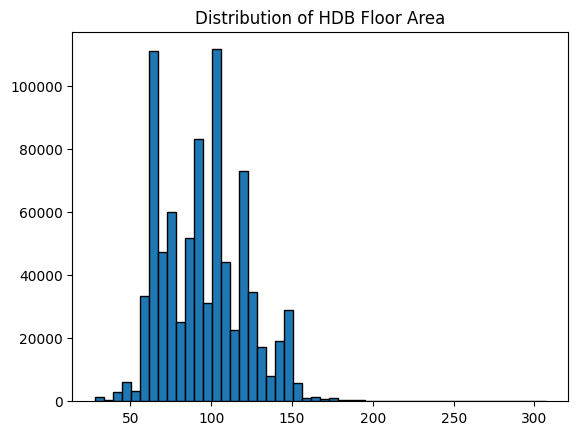

Terrace                 61
Maisonette              14
Executive Maisonette     7
Apartment                4
Adjoined flat            1
Name: flat_model, dtype: int64

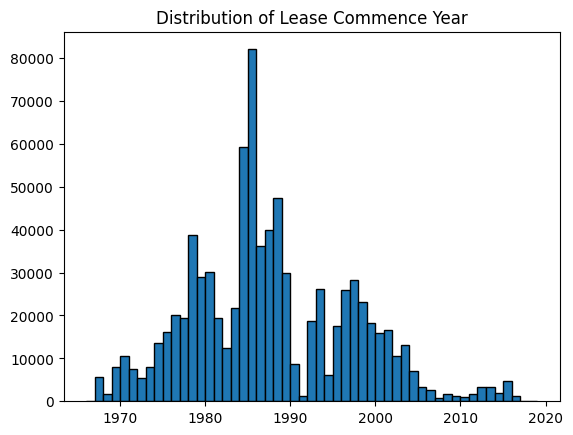

/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:2867: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:2871: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


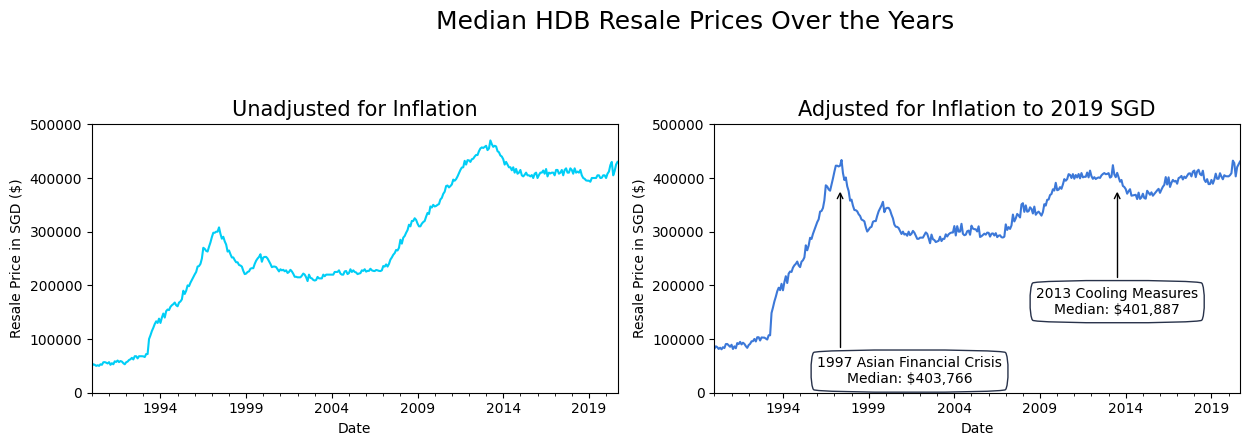

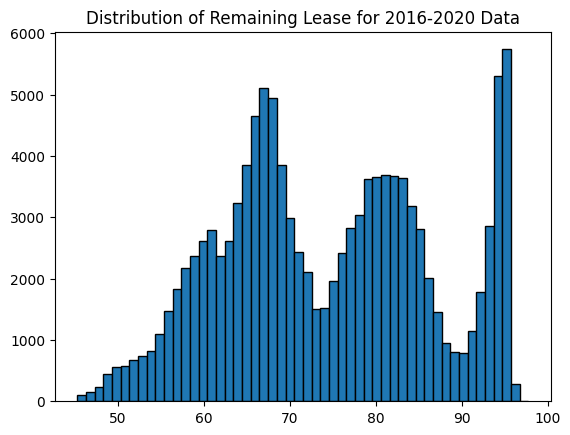

<class 'pandas.core.frame.DataFrame'>
Int64Index: 826581 entries, 0 to 826580
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                826581 non-null  datetime64[ns]
 1   town                 826581 non-null  object        
 2   flat_type            826581 non-null  object        
 3   block                826581 non-null  object        
 4   street_name          826581 non-null  object        
 5   storey_range         826581 non-null  object        
 6   floor_area_sqm       826581 non-null  float64       
 7   flat_model           826581 non-null  object        
 8   lease_commence_date  826581 non-null  int64         
 9   resale_price         826581 non-null  float64       
 10  remaining_lease      117527 non-null  float64       
 11  cpi                  826581 non-null  float64       
 12  real_price           826581 non-null  float64       
dtypes: datetime64[

In [ ]:
prices = pd.concat([price1999, price2012, price2014], sort=False)
prices = pd.concat([prices, price2016, price2017], axis=0, ignore_index=True, sort=False)

prices['month'] = pd.to_datetime(prices['month']) # to datetime

prices.info()
prices[~prices.isnull().any(axis=1)]['month'].dt.year.unique()
# Clean flat type
prices['flat_type'] = prices['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
prices['flat_type'].unique()
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}

prices = prices.replace({'flat_model': replace_values})

prices['flat_model'].value_counts()

prices['storey_range'].unique()

prices['town'].unique()

plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.show()
display(prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts())

bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

cpi['month'] = pd.to_datetime(cpi['month'], format='%Y %b') # to datetime
prices = prices.merge(cpi, on='month', how='left')

prices['real_price'] = (prices['resale_price'] / prices['cpi']) * 100



# Unadjusted
fig = plt.figure(figsize=(14,4.5))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot(121)
prices.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000), ax1.set_title('Unadjusted for Inflation', size=15)

ax2 = fig.add_subplot(122)
prices.groupby('month')[['real_price']].median().plot(ax=ax2, color='#3c78d8', legend=None)
ax2.set_xlabel('Date'), ax2.set_ylabel('Resale Price in SGD ($)'), ax2.set_ylim(0, 500000), ax2.set_title('Adjusted for Inflation to 2019 SGD',size=15)
ax2.annotate('1997 Asian Financial Crisis\nMedian: $403,766', xy=('1997-05-01',380000), xycoords='data',
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(50,-140), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
ax2.annotate('2013 Cooling Measures\nMedian: $401,887', xy=('2013-07-01',380000), xycoords='data',
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))
plt.tight_layout(rect=[0, 0, 0.9, 0.9])
plt.show()




# Convert remaining_lease to number of years
def getYears(text):
    if isinstance(text, str):
        yearmonth = [int(s) for s in text.split() if s.isdigit()]
        if len(yearmonth) > 1: # if there's year and month
            years = yearmonth[0] + (yearmonth[1]/12)
        else: # if only year
            years = yearmonth[0]
        return years
    else: # if int
        return text

prices['remaining_lease'] = prices['remaining_lease'].apply(lambda x: getYears(x))
bins = prices['remaining_lease'].max() - prices['remaining_lease'].min()
plt.hist(prices['remaining_lease'], bins=int(bins), edgecolor='black')
plt.title('Distribution of Remaining Lease for 2016-2020 Data')
plt.show()
prices.head()
prices.info()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 47.4 MB/s eta 0:00:00


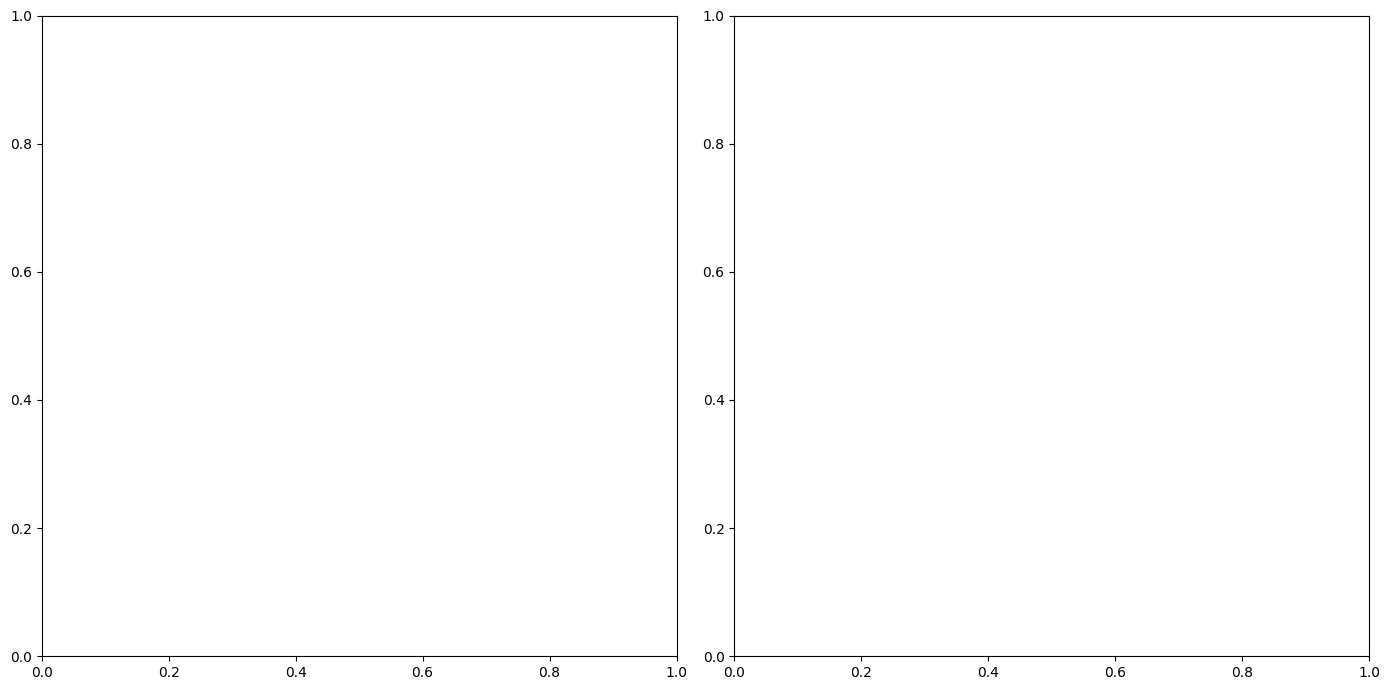

<ipython-input-12-8659b2159cb2>:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap=plt.cm.get_cmap('tab20', 4))


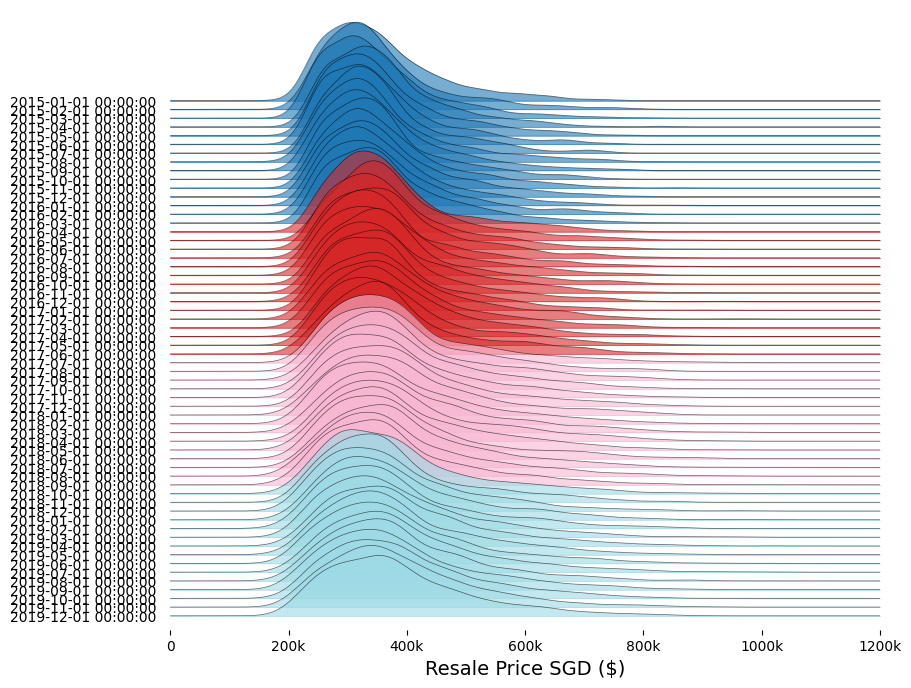

<ipython-input-12-8659b2159cb2>:70: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prices9719['change'] = prices9719.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
<ipython-input-12-8659b2159cb2>:77: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  prices9719_4room['change'] = pri

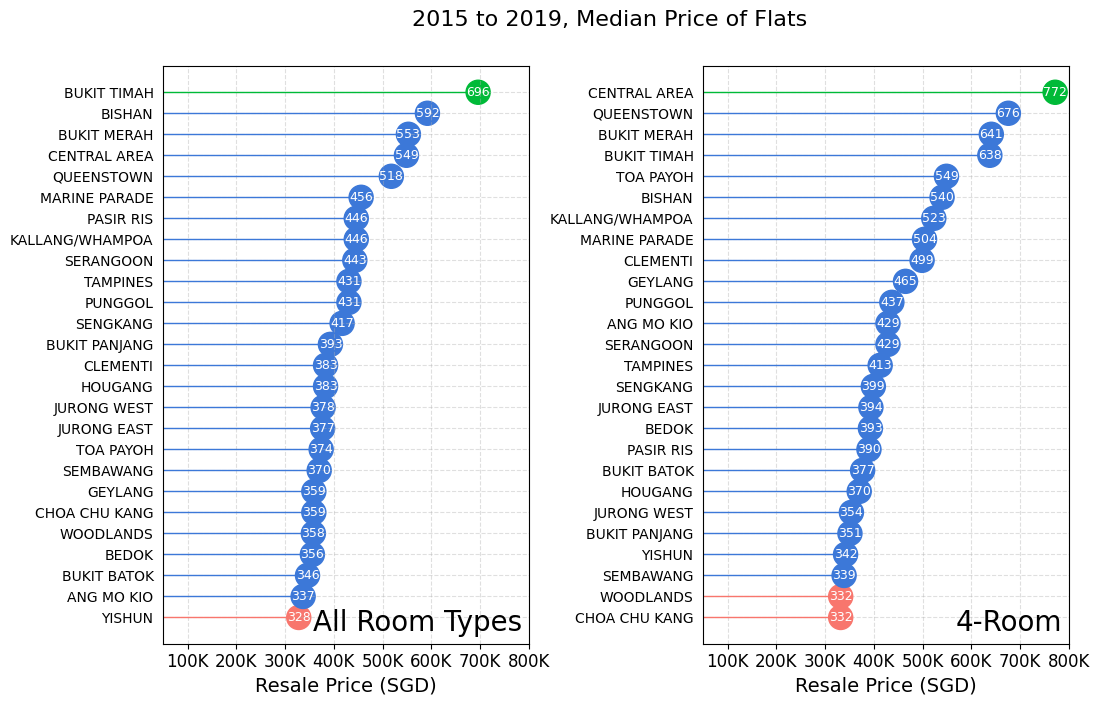

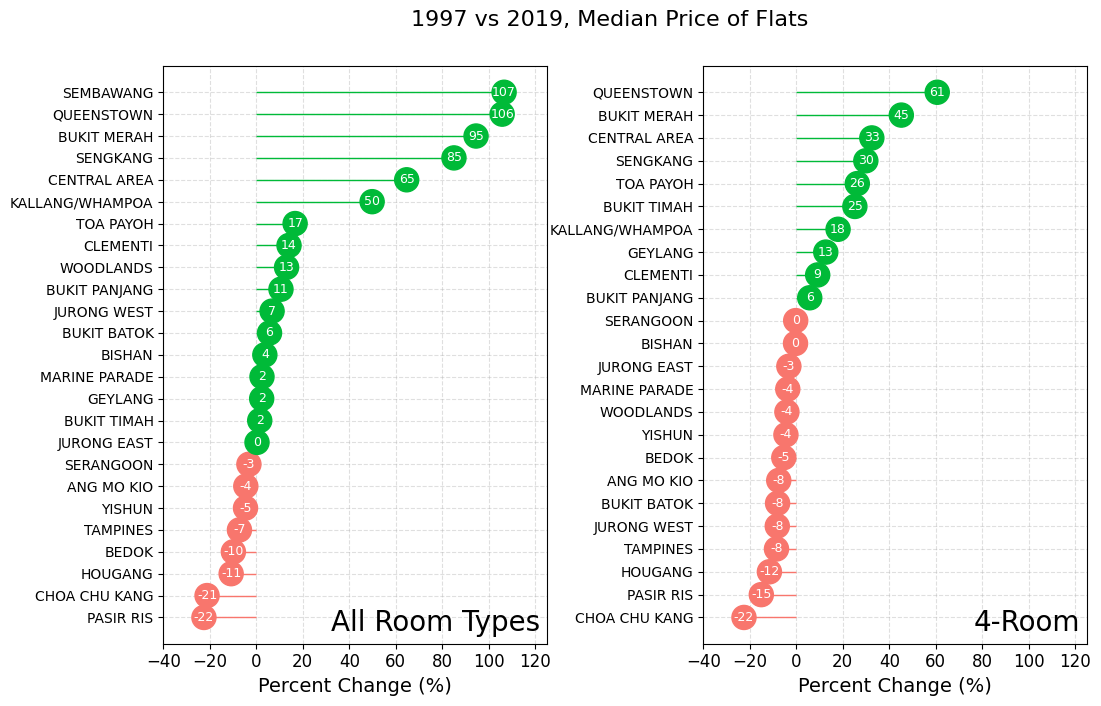

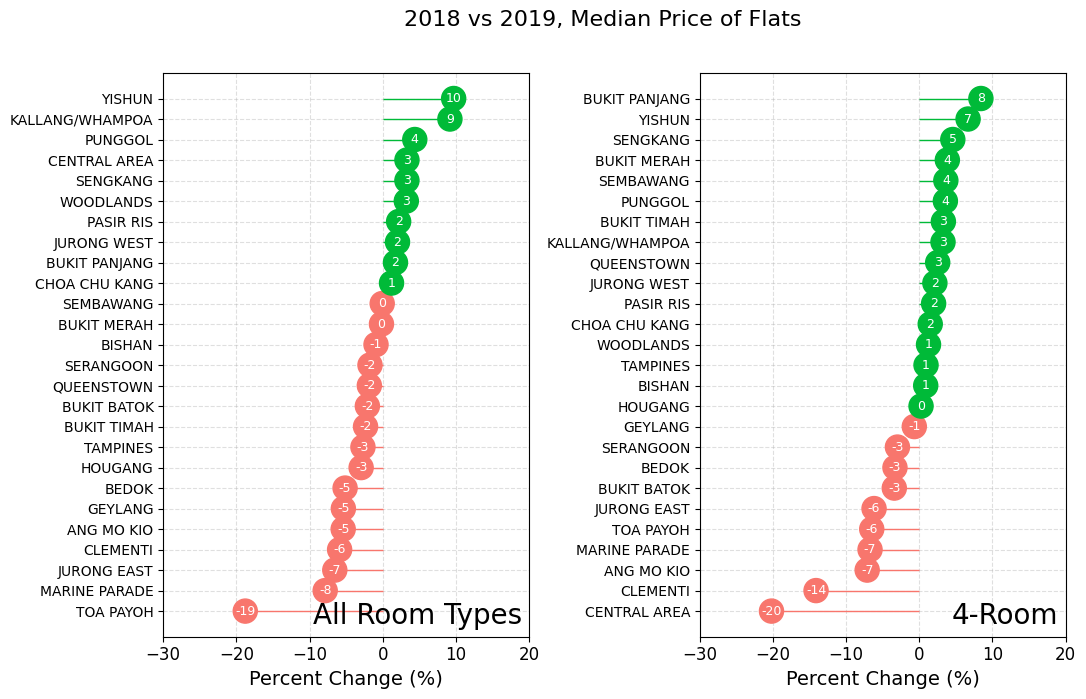

<ipython-input-12-8659b2159cb2>:156: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
<ipython-input-12-8659b2159cb2>:157: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
<ipython-input-12-8659b2159cb2>:157: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
<ipython-input-12-8659b2159cb2>:169: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels); ax2.set_ylabel('')


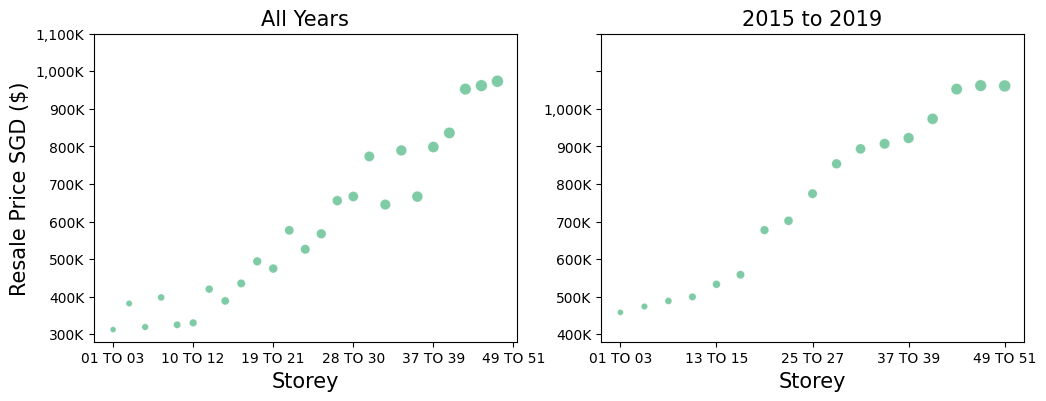

<ipython-input-12-8659b2159cb2>:183: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


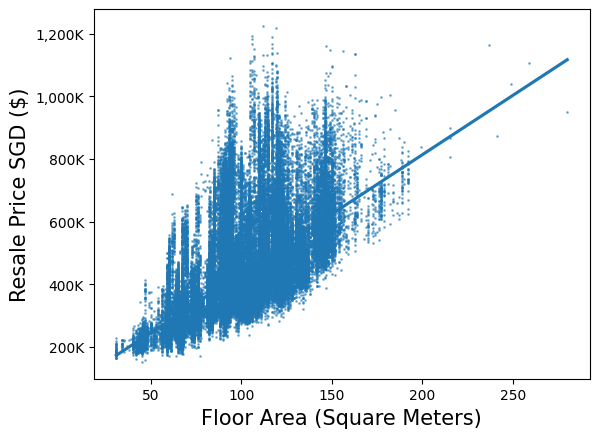

month             town  flat_type block          street_name  \
712167 2015-03-01  KALLANG/WHAMPOA     3 ROOM    53           JLN MA'MOR   
716959 2015-06-01  KALLANG/WHAMPOA     3 ROOM    60          JLN BAHAGIA   
745544 2016-12-01  KALLANG/WHAMPOA     3 ROOM    57           JLN MA'MOR   
755075 2017-06-01  KALLANG/WHAMPOA     3 ROOM    38          JLN BAHAGIA   
760156 2017-09-01    CHOA CHU KANG  EXECUTIVE   641  CHOA CHU KANG ST 64   
765900 2017-12-01  KALLANG/WHAMPOA     3 ROOM    65           JLN MA'MOR   
767035 2018-01-01    CHOA CHU KANG  EXECUTIVE   639  CHOA CHU KANG ST 64   
781983 2018-09-01  KALLANG/WHAMPOA     3 ROOM    41          JLN BAHAGIA   

       storey_range  floor_area_sqm            flat_model  \
712167     01 TO 03           280.0               Terrace   
716959     01 TO 03           241.0               Terrace   
745544     01 TO 03           259.0               Terrace   
755075     01 TO 03           215.0               Terrace   
760156     16 TO 18           215.0  Executive Maisonette   
765900     01 TO 03           249.0               Terrace   
767035     10 TO 12           215.0  Executive Maisonette   
781983     01 TO 03           237.0               Terrace   

        lease_commence_date  resale_price  remaining_lease      cpi  \
712167                 1972     1060000.0        56.000000  111.472   
716959                 1972      958000.0        56.000000  109.812   
745544                 1972     1150000.0        54.000000  103.855   
755075                 1972      830000.0        54.083333  103.097   
760156                 1998      888000.0        79.333333  102.393   
765900                 1972     1053888.0        53.583333  101.479   
767035                 1998      900000.0        79.000000  100.274   
781983                 1972     1185000.0        52.833333  101.889   

          real_price  year  
712167  9.509114e+05  2015  
716959  8.724001e+05  2015  
745544  1.107313e+06  2016  
755075  8.050671e+05  2017  
760156  8.672468e+05  2017  
765900  1.038528e+06  2017  
767035  8.975407e+05  2018  
781983  1.163030e+06  2018

<ipython-input-12-8659b2159cb2>:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(ylabels)
<ipython-input-12-8659b2159cb2>:208: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(ylabels)


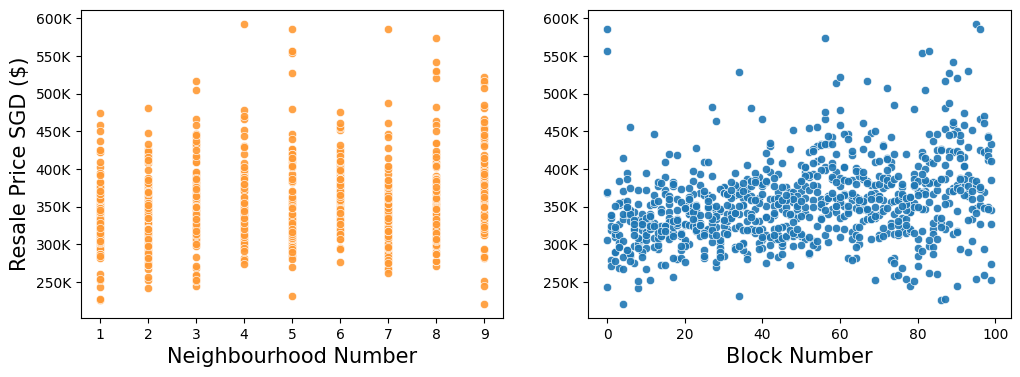

<ipython-input-12-8659b2159cb2>:219: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
<ipython-input-12-8659b2159cb2>:221: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(ylabels)


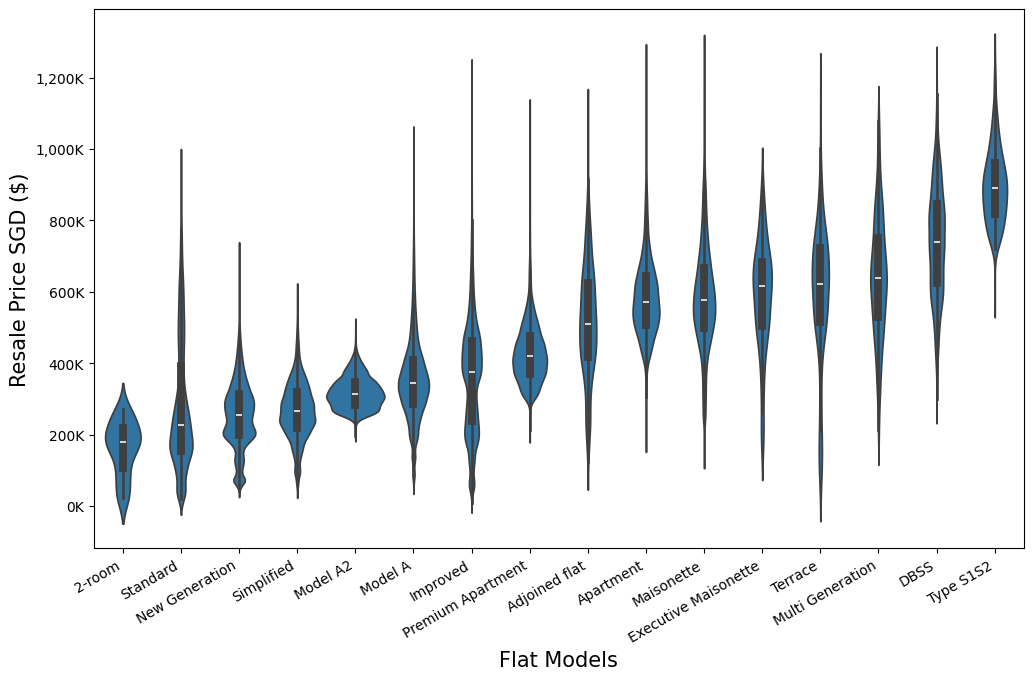

<ipython-input-12-8659b2159cb2>:230: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))


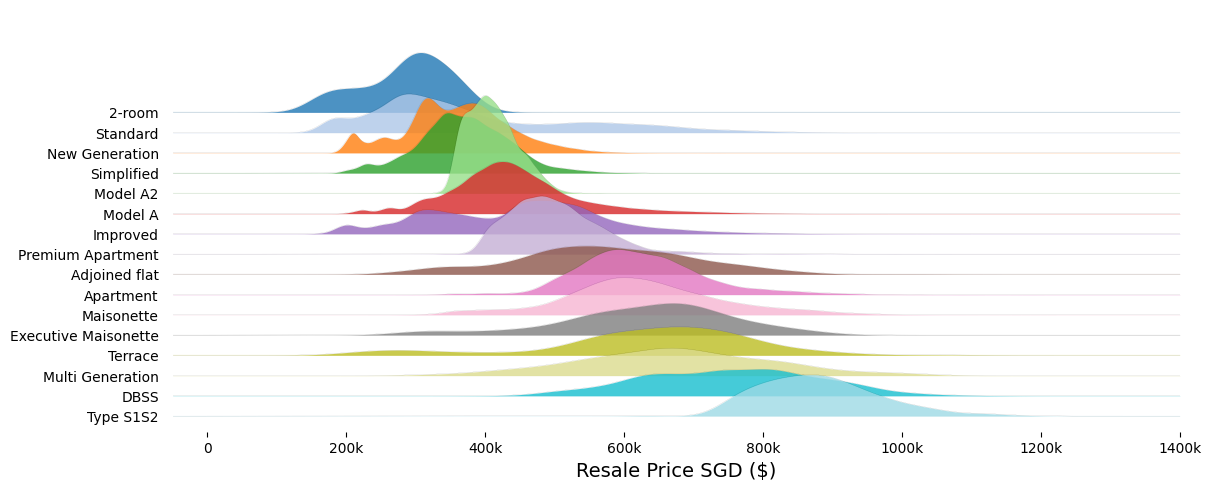

<ipython-input-12-8659b2159cb2>:242: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(xlabels)


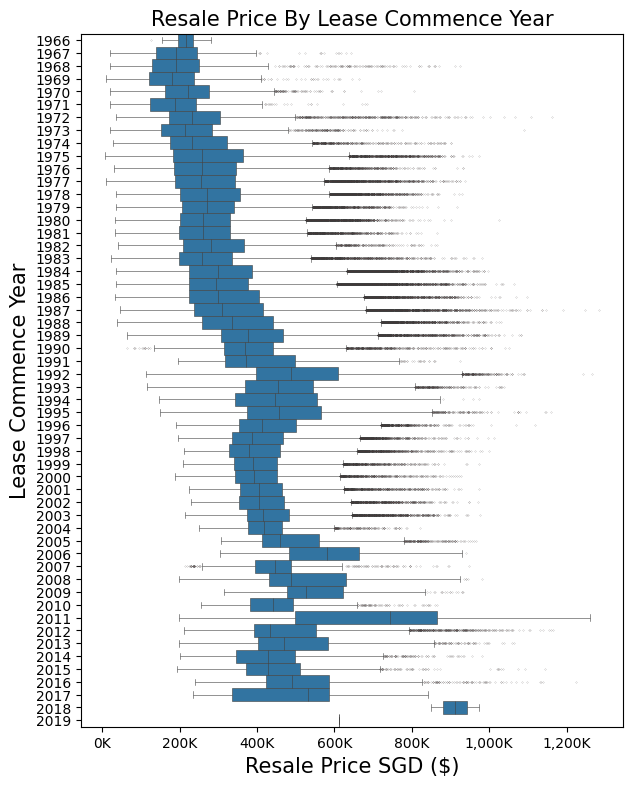

<ipython-input-12-8659b2159cb2>:248: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
<ipython-input-12-8659b2159cb2>:258: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prices1519['flat'] = prices['block'] + ' ' + prices['street_name']
<ipython-input-12-8659b2159cb2>:284: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ylabels), ax.set_ylabel('Resale Price SGD ($)', size=15)


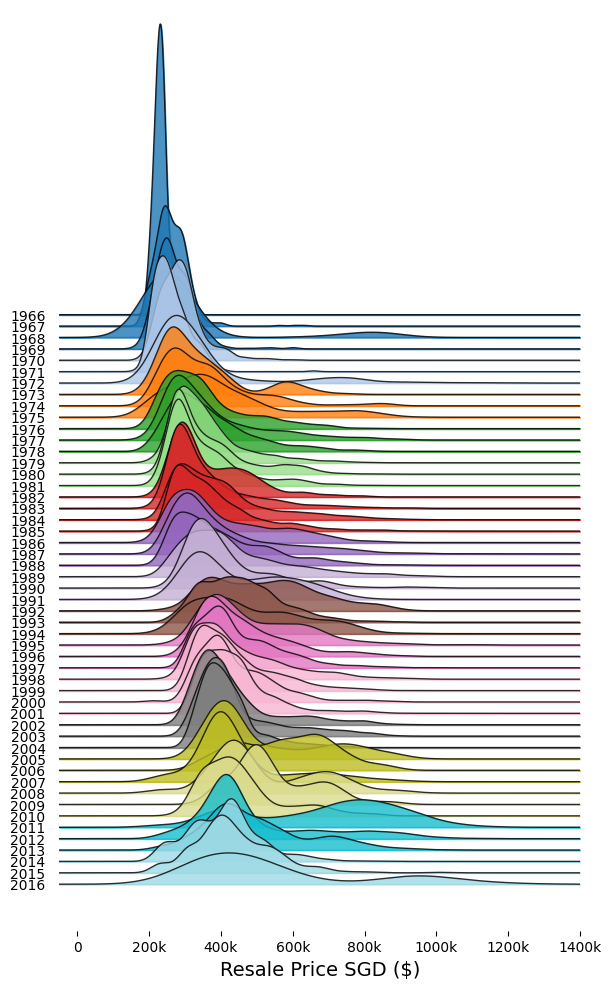

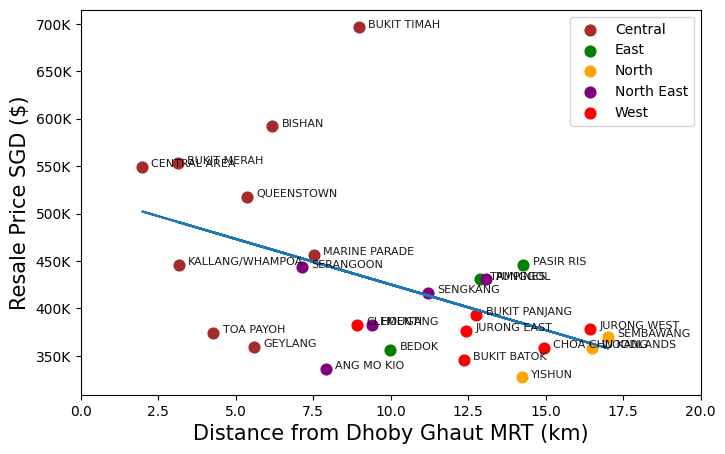

<ipython-input-12-8659b2159cb2>:299: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


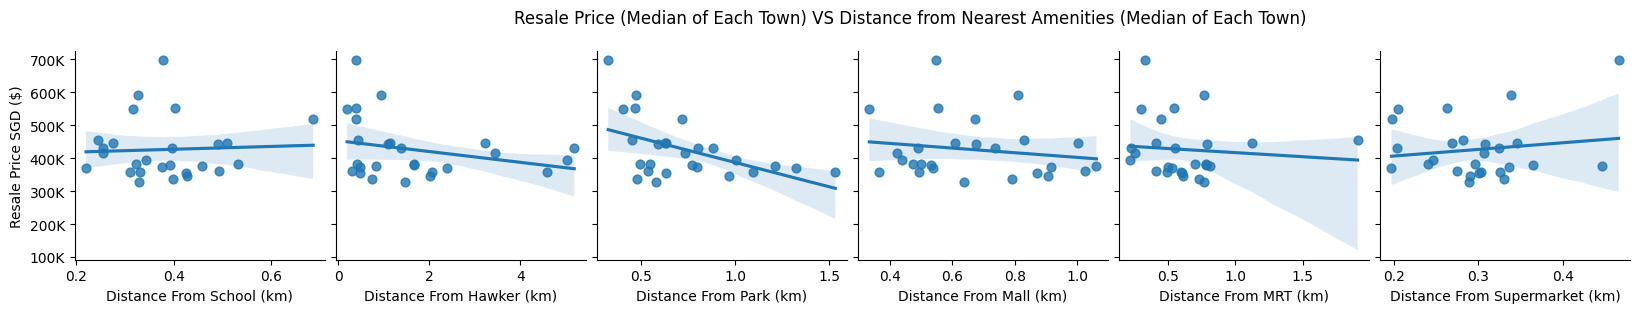

<ipython-input-12-8659b2159cb2>:311: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


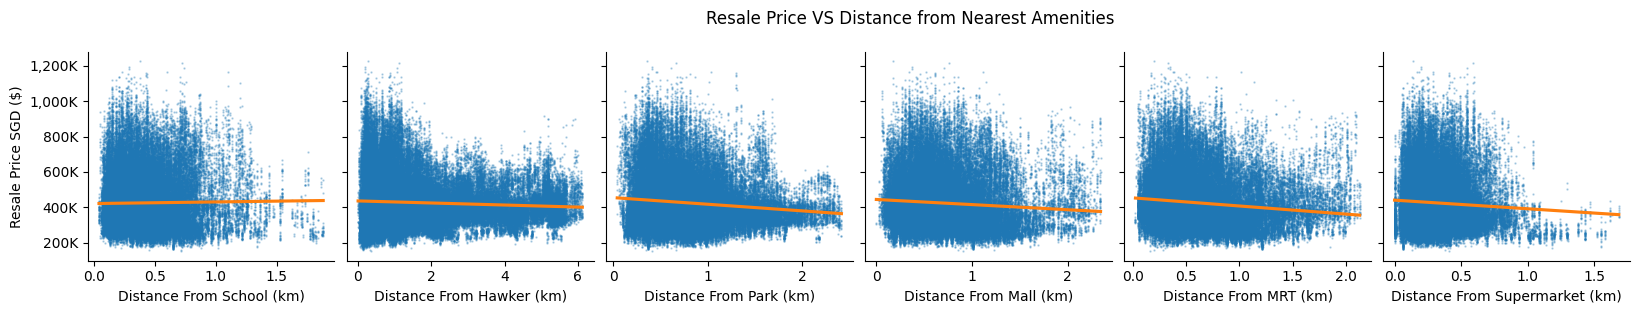

<ipython-input-12-8659b2159cb2>:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


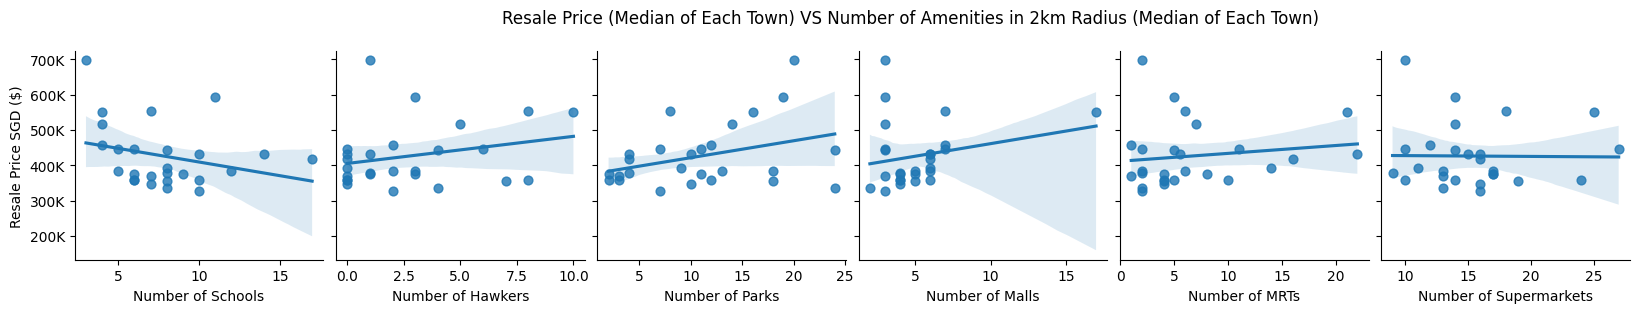

<ipython-input-12-8659b2159cb2>:337: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)


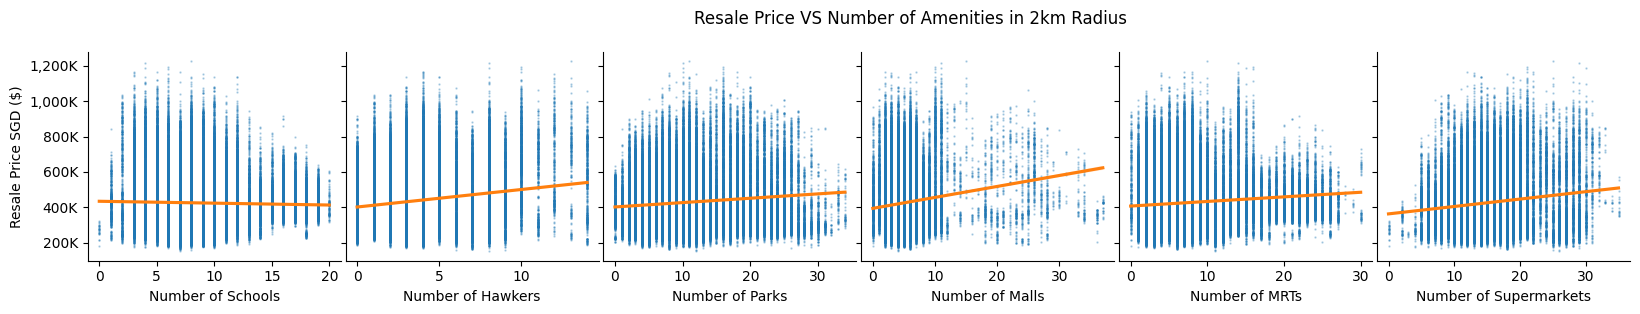

In [ ]:
!pip install pywaffle
from pywaffle import Waffle

flattype = dict(prices['flat_type'].value_counts() / len(prices) * 100)
flattype1519 = dict(prices.set_index('month')['2015':'2019'].reset_index()['flat_type'].value_counts() / len(prices.set_index('month')['2015':'2019'].reset_index()) * 100)

plt.figure(figsize=(14, 7))

# Plot Waffle chart for flat type - number of rooms (All Years)
plt.subplot(1, 2, 1)
waffle_all_years = Waffle(
    rows=5,
    values=flattype,
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    title={'label': 'Proportion of HDB Flat Types (All Years)', 'loc': 'left', 'fontsize': 16},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 11},
    icons='home',
    font_size=22,
    icon_legend=True
)

# Plot Waffle chart for flat type - number of rooms (2015-2019)
plt.subplot(1, 2, 2)
waffle_2015_2019 = Waffle(
    rows=5,
    values=flattype1519,
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    title={'label': 'Proportion of HDB Flat Types (2015-2019)', 'loc': 'left', 'fontsize': 16},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 11},
    icons='home',
    font_size=22,
    icon_legend=True
)

plt.tight_layout()
plt.show()

flattype = ['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE']
prices1519 = prices.set_index('month').sort_index().loc['2015-01':'2019-12']
prices1519 = prices1519[prices1519['flat_type'].isin(flattype)][['flat_type','real_price']].reset_index()
prices1519['flat_type_year'] = prices1519['flat_type'] + ' - ' + prices1519['month'].apply(lambda x: str(x)[:4])
prices1519
!pip install joypy
import joypy
import matplotlib.pyplot as plt  # Importing matplotlib for colormap
# Assuming 'month' is the correct column name containing the year information
fig, axes = joypy.joyplot(prices1519, by="month", column="real_price", figsize=(9,7),
                           linewidth=0.5, overlap=1.5, alpha=0.6,
                           colormap=plt.cm.get_cmap('tab20', 4))

axes[-1].set_xlim([0, 1200000])
# Adjusting the number of tick labels to match the number of tick locations
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.xlabel('Resale Price SGD ($)', fontsize=14)
plt.show()
## 2015 to 2019
prices['year'] = pd.DatetimeIndex(prices['month']).year # extract out year
prices1519 = prices[prices['year'].isin([2015,2016,2017,2018,2019])].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
prices1519['real_price'] = round(prices1519['real_price']/1000)
prices1519['color'] = ['#f8766d'] + ['#3c78d8']*(len(prices1519)-2) + ['#00ba38']

# 4-room
prices1519_4room = prices[(prices['flat_type'].isin(['4 ROOM'])) & (prices['year'].isin([2015,2016,2017,2018,2019]))].groupby(['town'], as_index=False).agg({'real_price': 'median'}).sort_values('real_price', ascending=True).reset_index(drop=True)
prices1519_4room['real_price'] = round(prices1519_4room['real_price']/1000)
prices1519_4room['color'] = ['#f8766d','#f8766d'] + ['#3c78d8']*(len(prices1519_4room)-3) + ['#00ba38']

## 1997 vs 2019
# all room type
prices9719 = prices[prices['year'].isin([1997,2019])].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
prices9719['change'] = prices9719.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
prices9719 = prices9719[prices9719['change'].notnull()]
prices9719 = prices9719.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
prices9719['color'] = prices9719['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4-room
prices9719_4room = prices[(prices['flat_type'].isin(['4 ROOM']) & prices['year'].isin([1997,2019]))].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
prices9719_4room['change'] = prices9719_4room.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
prices9719_4room = prices9719_4room[prices9719_4room.change.notnull()]
prices9719_4room = prices9719_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
prices9719_4room['color'] = prices9719_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

## 2018 vs 2019
# all room type
prices1819 = prices[prices['year'].isin([2018,2019])].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
prices1819['change'] = prices1819.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
prices1819 = prices1819[prices1819['change'].notnull()]
prices1819 = prices1819.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
prices1819['color'] = prices1819['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# 4-room
prices1819_4room = prices[(prices['flat_type'].isin(['4 ROOM']) & prices['year'].isin([2018,2019]))].groupby(['town','year'], as_index=False).agg({'real_price': 'median'})
prices1819_4room['change'] = prices1819_4room.groupby('town')['real_price'].apply(lambda x: x.pct_change()*100)
prices1819_4room = prices1819_4room[prices1819_4room.change.notnull()]
prices1819_4room = prices1819_4room.sort_values('change', ascending=True).reset_index(drop=True).reset_index()
prices1819_4room['color'] = prices1819_4room['change'].apply(lambda x: '#00ba38' if x > 0 else '#f8766d')

# Function for lollipop charts
def loll_plot(df, x, y, subtitle, xlabel, xlim):
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    plt.annotate(subtitle, xy=(1, 0), xycoords='axes fraction', fontsize=20,
                    xytext=(-5, 5), textcoords='offset points',
                    ha='right', va='bottom')
    plt.yticks(df.index, df[y]); plt.xticks(fontsize=12); plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=14)

fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(prices1519, 'real_price', 'town', 'All Room Types', 'Resale Price (SGD)', [50,800])
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
ax1.yaxis.set_ticks_position('none')

ax2 = plt.subplot(122)
loll_plot(prices1519_4room, 'real_price', 'town', '4-Room', 'Resale Price (SGD)', [50,800])
ax2.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax2.get_xticks()])
ax2.yaxis.set_ticks_position('none')

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2015 to 2019, Median Price of Flats', fontsize=16)
plt.show()
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(prices9719, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-40,125])

ax2 = plt.subplot(122)
loll_plot(prices9719_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-40,125])

fig.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.suptitle('1997 vs 2019, Median Price of Flats', fontsize=16)
plt.show()
fig = plt.figure(figsize=(12,7))

ax1 = plt.subplot(121)
loll_plot(prices1819, 'change', 'town', 'All Room Types', 'Percent Change (%)', [-30,20])

ax2 = plt.subplot(122)
loll_plot(prices1819_4room, 'change', 'town', '4-Room', 'Percent Change (%)', [-30,20])

fig.tight_layout(pad=0.5, rect=[0, 0, 0.9, 0.9])
plt.suptitle('2018 vs 2019, Median Price of Flats', fontsize=16)
plt.show()
fig = plt.figure(figsize=(12,4))

# Storey Prices
ax1 = plt.subplot(121)
storey = prices.groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['real_price'], size=storey['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('All Years', size=15)

# Floor Area Prices
ax2 = plt.subplot(122)
storey2 = prices[prices['year'].isin([2015,2016,2017,2018,2019])].groupby('storey_range')['real_price'].median().reset_index().sort_values(by='storey_range')
storey2['storey_rank'] = storey2['storey_range'].astype('category').cat.codes

# Bubble chart
b=sns.scatterplot(x=storey2['storey_rank'], y=storey2['real_price'], size=storey2['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, legend=False, ax=ax2)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels); ax2.set_ylabel('')
ax2.set_xticks([0,4,8,12,16])
ax2.set_xticklabels(storey2.iloc[[0,4,8,12,16],0])
ax2.set_ylim([280000,1100000]), ax2.set_xlabel('Storey', size=15)
ax2.set_title('2015 to 2019', size=15)

plt.show()
storey
storey.head()

# Floor Area Prices
area = prices[prices['year'].isin([2015,2016,2017,2018,2019])]
p=sns.regplot(x='floor_area_sqm', y='real_price', data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
p.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()
display(area[area['floor_area_sqm'] > 200])


import re
# Block Number Prices
get_num = lambda x: int(re.findall("\d+", x)[0])
prices['blocknum'] = prices['block'].apply(get_num) # get only digits from block number
tmp = prices[prices['blocknum'] > 99] # get only blocks that use 3-digit numbering system
tmp = tmp.groupby('blocknum')['real_price'].median().reset_index()

# Scatterplots
fig = plt.figure(figsize=(12,4))

ax1 = plt.subplot(121)
a=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[0])), y=tmp['real_price'], color='#ff9933', edgecolors='w', alpha=0.9)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Neighbourhood Number', size=15)

ax2 = plt.subplot(122)
b=sns.scatterplot(x=tmp['blocknum'].apply(lambda x: int(str(x)[1:])), y=tmp['real_price'], edgecolors='w', alpha=0.9)
ax2.set_yticklabels(ylabels)
ax2.set_ylabel('', size=15)
ax2.set_xlabel('Block Number', size=15)

plt.show()

# Violin plots for price distribution of each flat model

fig = plt.figure(figsize=(12,7))
p=sns.violinplot(x='flat_model', y='real_price', data=prices, width=1,
                order=prices.groupby('flat_model')['real_price'].median().sort_values().reset_index()['flat_model'].tolist())
p.set_xticklabels(p.get_xticklabels(), rotation=30, ha='right'), p.set_xlabel('Flat Models', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_yticks()/1000]
p.set_yticklabels(ylabels)
p.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

import joypy

tmp = prices.set_index('flat_model')
tmp = tmp.loc[prices.groupby('flat_model')['real_price'].median().sort_values().reset_index()['flat_model'].tolist()].reset_index().groupby("flat_model", sort=False)
fig, axes = joypy.joyplot(tmp, by="flat_model", column="real_price",figsize=(12,5),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
axes[-1].set_xlim([-50000,1400000])
# Adjusting the number of tick labels to match the number of tick locations
axes[-1].set_xticklabels(['-50k', '0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.xlabel('Resale Price SGD ($)', fontsize=14)
plt.show()
# Boxplot for each year of lease commence date

fig = plt.figure(figsize=(7,9))
p=sns.boxplot(y='lease_commence_date', x='real_price', data=prices, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()

tmp = prices[prices['year'].isin([2015,2016,2017,2018,2019])]
fig, axes = joypy.joyplot(tmp, by="lease_commence_date", column="real_price",figsize=(6,10),
             linewidth=1,overlap=5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',16))
axes[-1].set_xlim([-50000,1400000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k'])
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

flat_amenities = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flat_amenities.csv')

# merge amenities data to flat data
prices1519 = prices[prices['year'].isin([2015,2016,2017,2018,2019])]
prices1519['flat'] = prices['block'] + ' ' + prices['street_name']
prices1519 = prices1519.merge(flat_amenities, on='flat', how='left')

# reduce number of class of town to regions
d_region = {'ANG MO KIO':'North East', 'BEDOK':'East', 'BISHAN':'Central', 'BUKIT BATOK':'West', 'BUKIT MERAH':'Central',
       'BUKIT PANJANG':'West', 'BUKIT TIMAH':'Central', 'CENTRAL AREA':'Central', 'CHOA CHU KANG':'West',
       'CLEMENTI':'West', 'GEYLANG':'Central', 'HOUGANG':'North East', 'JURONG EAST':'West', 'JURONG WEST':'West',
       'KALLANG/WHAMPOA':'Central', 'MARINE PARADE':'Central', 'PASIR RIS':'East', 'PUNGGOL':'North East',
       'QUEENSTOWN':'Central', 'SEMBAWANG':'North', 'SENGKANG':'North East', 'SERANGOON':'North East', 'TAMPINES':'East',
       'TOA PAYOH':'Central', 'WOODLANDS':'North', 'YISHUN':'North'}
prices1519['region'] = prices1519['town'].map(d_region)
colors = {'North East':'Purple', 'East':'Green', 'Central':'Brown', 'West':'Red', 'North':'Orange'}

# get median info of each town
tmp = prices1519.groupby('town')[['dist_dhoby','school_dist','num_school_2km','hawker_dist','num_hawker_2km','park_dist','num_park_2km','mall_dist','num_mall_2km','mrt_dist','num_mrt_2km','supermarket_dist','num_supermarket_2km','real_price']].median().reset_index()
tmp['region'] = tmp['town'].map(d_region)

# Scatterplot with names of towns
fig, ax = plt.subplots(figsize=(8,5))
grouped = tmp.groupby('region')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='dist_dhoby', y='real_price', label=key, color=colors[key], s=60)
b, a = np.polyfit(tmp['dist_dhoby'], tmp['real_price'], 1)
ax.plot(tmp['dist_dhoby'], a + b* tmp['dist_dhoby'], '-')
ax.set_xlim([0,20]), ax.set_xlabel('Distance from Dhoby Ghaut MRT (km)', size=15)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000]
ax.set_yticklabels(ylabels), ax.set_ylabel('Resale Price SGD ($)', size=15)
for i, txt in enumerate(tmp['town']):
    ax.annotate(txt, (tmp['dist_dhoby'][i]+0.3, tmp['real_price'][i]), size=8, alpha=0.9)

plt.show()

prices1519.groupby('region')['real_price'].median()



# scatterplot for median price of each town against nearest distance from each amenity

p=sns.pairplot(tmp, x_vars=["school_dist", "hawker_dist", "park_dist", "mall_dist", "mrt_dist", "supermarket_dist"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From School (km)', size=10), axes[0,1].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,2].set_xlabel('Distance From Park (km)', size=10), axes[0,3].set_xlabel('Distance From Mall (km)', size=10)
axes[0,4].set_xlabel('Distance From MRT (km)', size=10), axes[0,5].set_xlabel('Distance From Supermarket (km)', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest Amenities (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()
# scatterplot for price of each flat against nearest distance from each amenity

p=sns.pairplot(prices1519[prices1519['school_dist']<3], x_vars=["school_dist", "hawker_dist", "park_dist", "mall_dist", "mrt_dist", "supermarket_dist"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e'))) # remove outliers (>3km)
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From School (km)', size=10), axes[0,1].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,2].set_xlabel('Distance From Park (km)', size=10), axes[0,3].set_xlabel('Distance From Mall (km)', size=10)
axes[0,4].set_xlabel('Distance From MRT (km)', size=10), axes[0,5].set_xlabel('Distance From Supermarket (km)', size=10)
plt.suptitle('Resale Price VS Distance from Nearest Amenities')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()
# scatterplot for median price of each town against number of amenities

p=sns.pairplot(tmp, x_vars=["num_school_2km", "num_hawker_2km", "num_park_2km", "num_mall_2km", "num_mrt_2km", "num_supermarket_2km"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Schools', size=10), axes[0,1].set_xlabel('Number of Hawkers', size=10)
axes[0,2].set_xlabel('Number of Parks', size=10), axes[0,3].set_xlabel('Number of Malls', size=10)
axes[0,4].set_xlabel('Number of MRTs', size=10), axes[0,5].set_xlabel('Number of Supermarkets', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Number of Amenities in 2km Radius (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()


# scatterplot for price of each flat against number of amenities

p=sns.pairplot(prices1519, x_vars=["num_school_2km", "num_hawker_2km", "num_park_2km", "num_mall_2km", "num_mrt_2km", "num_supermarket_2km"], y_vars=["real_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=0.5,alpha=0.3), line_kws=dict(color='#ff7f0e')))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Schools', size=10), axes[0,1].set_xlabel('Number of Hawkers', size=10)
axes[0,2].set_xlabel('Number of Parks', size=10), axes[0,3].set_xlabel('Number of Malls', size=10)
axes[0,4].set_xlabel('Number of MRTs', size=10), axes[0,5].set_xlabel('Number of Supermarkets', size=10)
plt.suptitle('Resale Price VS Number of Amenities in 2km Radius')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

<ipython-input-13-bef4bb683d9d>:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
<ipython-input-13-bef4bb683d9d>:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
<ipython-input-13-bef4bb683d9d>:12: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the function.
  df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
<ipytho

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101409 entries, 0 to 101408
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   town                 101409 non-null  object 
 1   flat_type            101409 non-null  object 
 2   storey_range         101409 non-null  object 
 3   floor_area_sqm       101409 non-null  float64
 4   flat_model           101409 non-null  object 
 5   lease_commence_date  101409 non-null  int64  
 6   year                 101409 non-null  int64  
 7   school_dist          101409 non-null  float64
 8   num_school_2km       101409 non-null  float64
 9   hawker_dist          101409 non-null  float64
 10  num_hawker_2km       101409 non-null  float64
 11  park_dist            101409 non-null  float64
 12  num_park_2km         101409 non-null  float64
 13  mall_dist            101409 non-null  float64
 14  num_mall_2km         101409 non-null  float64
 15  mrt_dist         

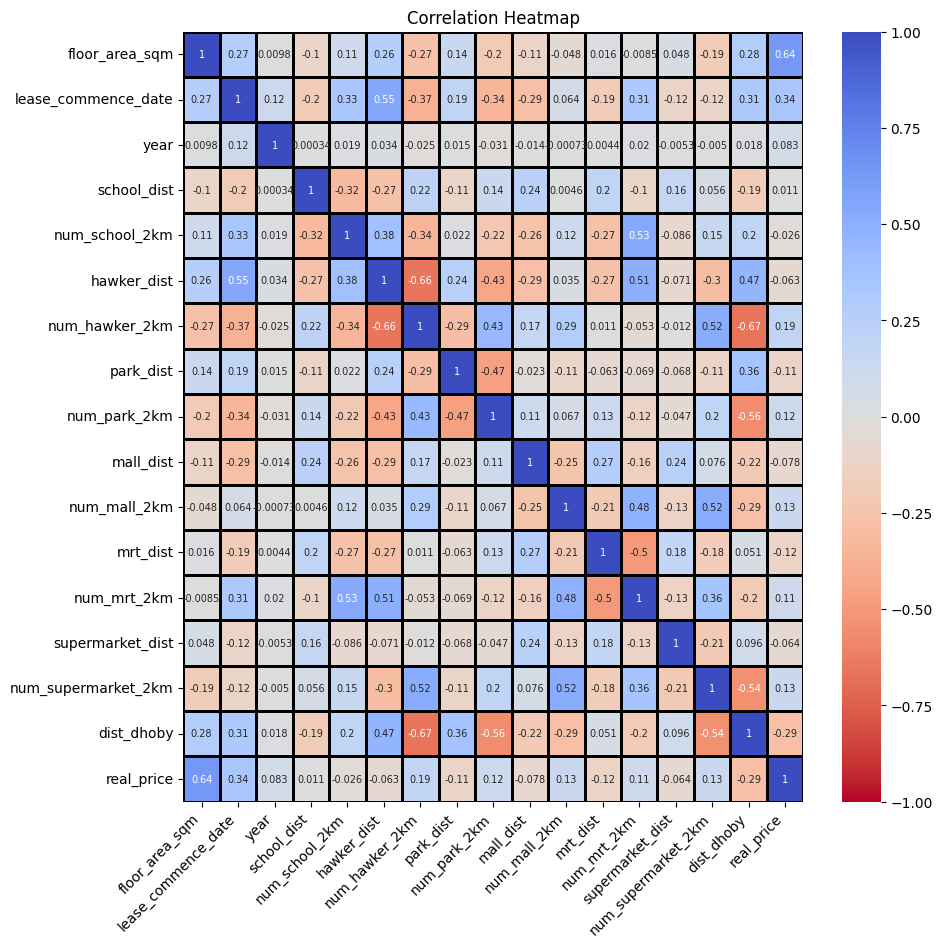

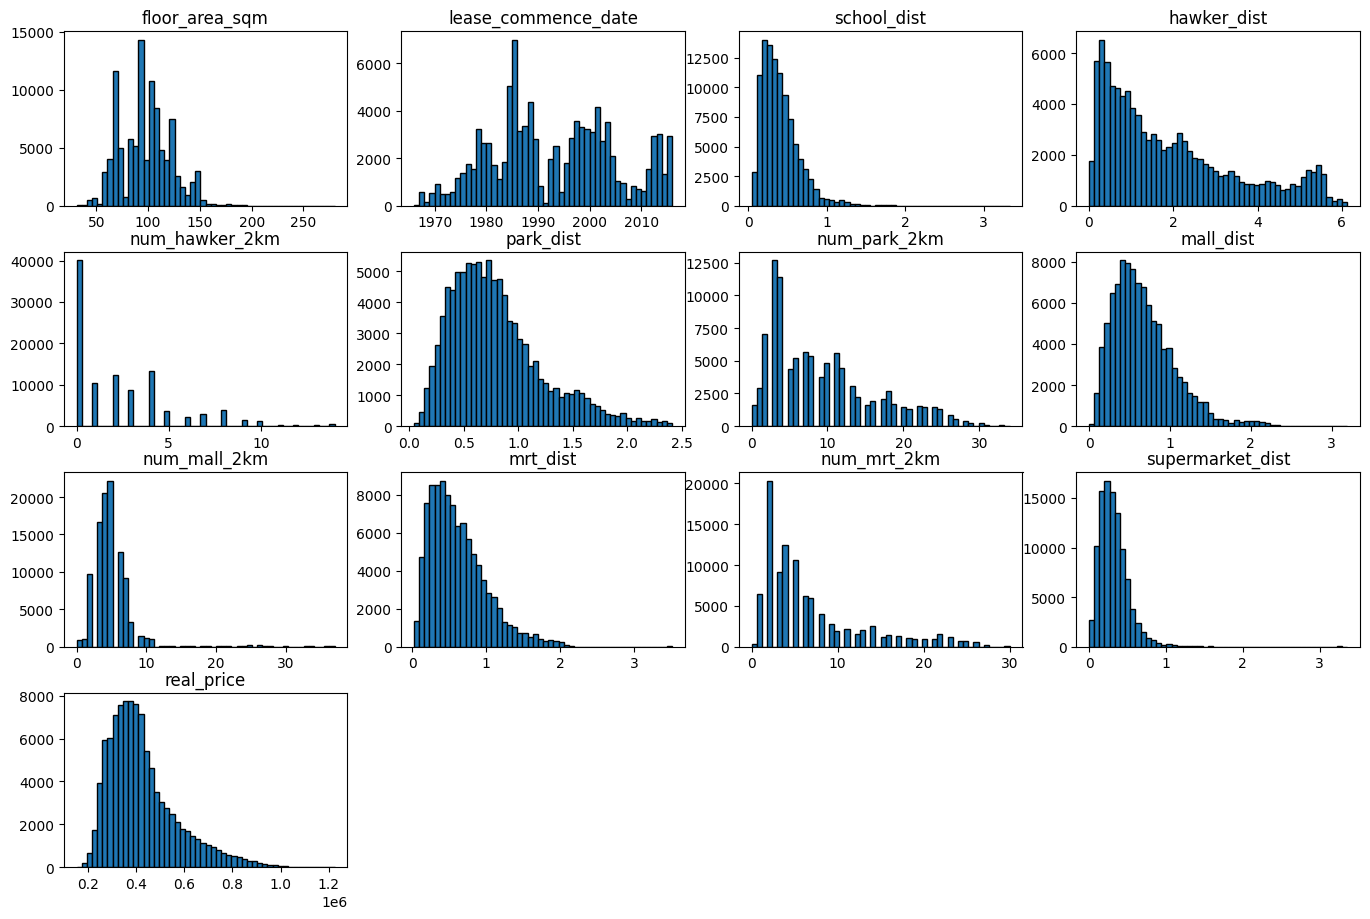

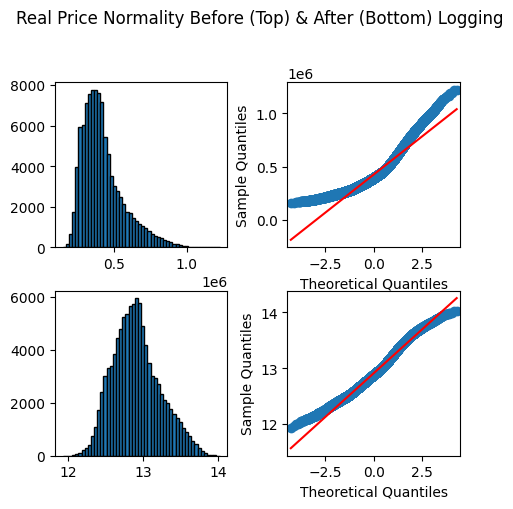

Model A           37973
Standard          28539
New Generation    15389
Apartment         14532
Maisonette         3151
Special            1744
Name: flat_model, dtype: int64

Model A           37973
Standard          28539
New Generation    15389
Apartment         14532
Maisonette         3151
Special            1744
Name: flat_model, dtype: int64

town  flat_type  storey_range  floor_area_sqm flat_model  \
0     TAMPINES          2             0           108.0    Model A   
1  BUKIT BATOK          2             0           103.0    Model A   
2  JURONG WEST          1             0            74.0    Model A   
3  JURONG WEST          1             0            74.0    Model A   
4  JURONG WEST          1             0            74.0    Model A   

   lease_commence_date  school_dist  hawker_dist  num_hawker_2km  park_dist  \
0                 1985     0.359916     1.015992             1.0   0.591787   
1                 1986     0.428729     2.476292             0.0   0.976805   
2                 1984     0.174088     0.441678             4.0   0.725144   
3                 1986     0.409651     0.095477             3.0   1.147330   
4                 1985     0.437646     0.522134             4.0   1.329356   

   num_park_2km  mall_dist  num_mall_2km  mrt_dist  num_mrt_2km  \
0           8.0   0.222197           6.0  0.265708          5.0   
1          10.0   1.395023           4.0  0.542323          6.0   
2           4.0   0.907439           3.0  0.229473          3.0   
3           4.0   0.772041           3.0  0.753994          3.0   
4           3.0   1.276048           2.0  0.806693          2.0   

   supermarket_dist region     real_price  
0          0.197700   East  470763.371323  
1          0.334088   West  368625.028643  
2          0.467091   West  253396.280952  
3          0.194830   West  263833.992095  
4          0.301456   West  261857.707510

floor_area_sqm  lease_commence_date  school_dist  hawker_dist  \
0        0.434709            -0.637010    -0.173252    -0.584115   
1        0.227901            -0.553487     0.112022     0.343105   
2       -0.971581            -0.720534    -0.943631    -0.948777   
3       -0.971581            -0.553487     0.032932    -1.168598   
4       -0.971581            -0.637010     0.148990    -0.897691   

   num_hawker_2km  park_dist  num_park_2km  mall_dist  num_mall_2km  mrt_dist  \
0       -0.481922  -0.483176     -0.183114  -1.174579      0.329413 -0.920217   
1       -0.838824   0.416079      0.104527   1.881664     -0.309844 -0.199828   
2        0.588787  -0.171706     -0.758398   0.611078     -0.629472 -1.014584   
3        0.231884   0.814358     -0.758398   0.258249     -0.629472  0.351427   
4        0.588787   1.239501     -0.902218   1.571630     -0.949100  0.488672   

   ...     real_price  region_East region_North  region_North East  \
0  ...  470763.371323            1            0                  0   
1  ...  368625.028643            0            0                  0   
2  ...  253396.280952            0            0                  0   
3  ...  263833.992095            0            0                  0   
4  ...  261857.707510            0            0                  0   

   region_West  model_Apartment  model_Maisonette  model_Model A  \
0            0                0                 0              1   
1            1                0                 0              1   
2            1                0                 0              1   
3            1                0                 0              1   
4            1                0                 0              1   

   model_New Generation  model_Special  
0                     0              0  
1                     0              0  
2                     0              0  
3                     0              0  
4                     0              0  

[5 rows x 25 columns]

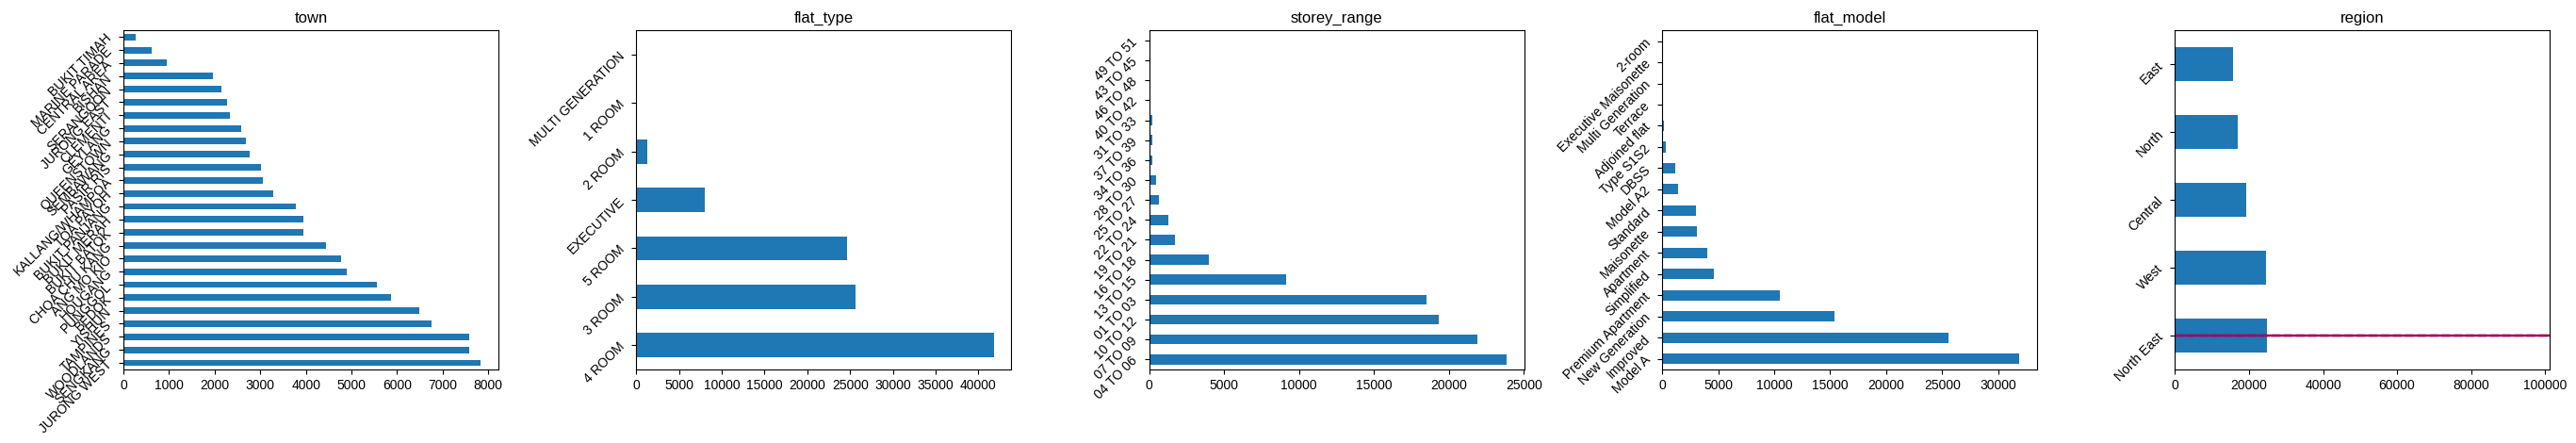

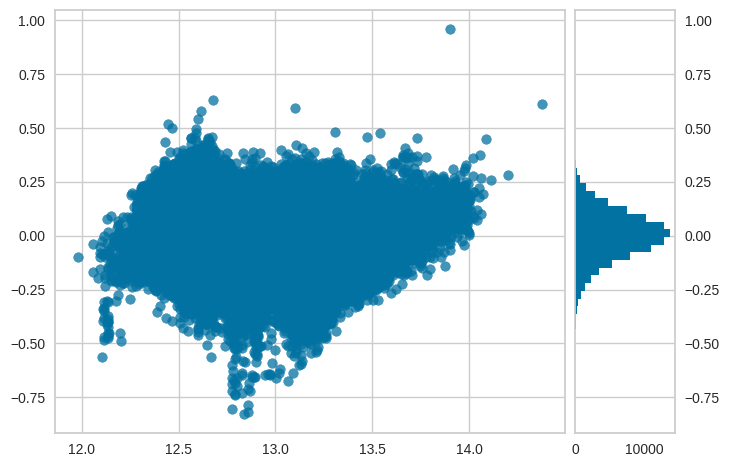

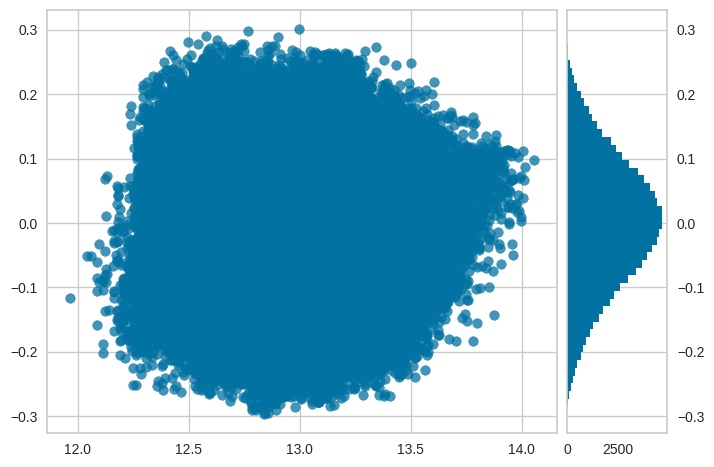

In [ ]:
# clear unused variables
del(price1999, price2012, price2014, price2016, price2017, prices1819, prices1819_4room, prices9719, prices9719_4room,
    storey, storey2, tmp, xlabels, ylabels, p, grouped, flattype, flat_amenities, cpi, ax, ax1, ax2, area)
import gc
gc.collect()

df = prices1519[['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'year', 'school_dist', 'num_school_2km', 'hawker_dist', 'num_hawker_2km', 'park_dist', 'num_park_2km', 'mall_dist', 'num_mall_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist', 'num_supermarket_2km', 'dist_dhoby', 'region', 'real_price']]

# function for replacing NAs with median of the town
def replace_NA_median(df, columns):
    for c in columns:
        df[c] = df.groupby("town").transform(lambda x: x.fillna(x.median()))[c]
    return df

df = replace_NA_median(df, ['school_dist', 'num_school_2km', 'hawker_dist',
       'num_hawker_2km', 'park_dist', 'num_park_2km', 'mall_dist',
       'num_mall_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist',
       'num_supermarket_2km', 'dist_dhoby'])
df.info()

# Correlation heatmap
fig = plt.figure(figsize=(10,10))
ax = sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot = True, fmt='.2g',
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})
#ax.set_ylim(0 ,5)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()



# Multicollinearity
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['tolerance'] = 1/vif.VIF
    vif['meanVIF'] = vif.VIF.mean()

    return(vif)

calc_vif(df.drop('real_price',axis=1).select_dtypes(include=['int64','float64']))
calc_vif(df.drop(['real_price','num_supermarket_2km','year','num_school_2km','dist_dhoby'],axis=1).select_dtypes(include=['int64','float64']))
# drop columns
lr_df = df.drop(['num_supermarket_2km','year','num_school_2km','dist_dhoby'], axis=1)

# Plot distribution for each continuous variable
lr_df.hist(bins=50, figsize=(15, 10), grid=False, edgecolor='black')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()
# plot qqplot before and after log transformation

from statsmodels.api import qqplot
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(5,5))

ax1.hist(lr_df['real_price'], bins=50, edgecolor='black')
qqplot(lr_df['real_price'], line='s', ax=ax2)
ax3.hist(np.log(lr_df['real_price']), bins=50, edgecolor='black')
qqplot(np.log(lr_df['real_price']), line='s', ax=ax4)
plt.suptitle('Real Price Normality Before (Top) & After (Bottom) Logging')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()


# Frequency plots for catergorical features
fig = plt.figure(figsize=(30,5))
for count, col in enumerate(df.select_dtypes(include=['category','object']).columns):
    fig.add_subplot(1,5,count+1)
    df[col].value_counts().plot.barh()
    plt.title(col)
    plt.yticks(rotation=45)
    plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

# label encode storeys
df = df.sort_values(by='storey_range')
df['storey_range'] = df['storey_range'].astype('category').cat.codes # label encode
lr_df = lr_df.sort_values(by='storey_range')
lr_df['storey_range'] = lr_df['storey_range'].astype('category').cat.codes # label encode

# remove flat types with very few cases
df = df[~df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]
lr_df = lr_df[~lr_df['flat_type'].isin(['MULTI GENERATION', '1 ROOM'])]

# Re-categorize flat model to reduce num classes
replace_values = {'Executive Maisonette':'Maisonette', 'Terrace':'Special', 'Adjoined flat':'Special',
                    'Type S1S2':'Special', 'DBSS':'Special', 'Model A2':'Model A', 'Premium Apartment':'Apartment', 'Improved':'Standard', 'Simplified':'Model A', '2-room':'Standard'}
df = df.replace({'flat_model': replace_values})
lr_df = lr_df.replace({'flat_model': replace_values})

# Label encode flat type
replace_values = {'2 ROOM':0, '3 ROOM':1, '4 ROOM':2, '5 ROOM':3, 'EXECUTIVE':4}
df = df.replace({'flat_type': replace_values})
lr_df = lr_df.replace({'flat_type': replace_values})

df = df.reset_index(drop=True)
display(df['flat_model'].value_counts())
lr_df = lr_df.reset_index(drop=True)
display(lr_df['flat_model'].value_counts())
display(lr_df.head())


## dummy encoding
df = pd.get_dummies(df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline
df = pd.get_dummies(df, columns=['flat_model'], prefix=['model'])
df= df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline
lr_df = pd.get_dummies(lr_df, columns=['region'], prefix=['region'], drop_first=True) # central is baseline
lr_df = pd.get_dummies(lr_df, columns=['flat_model'], prefix=['model'])
lr_df= lr_df.drop('model_Standard',axis=1) # remove standard, setting it as the baseline


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# fit to continuous columns and transform
scaled_columns = ['floor_area_sqm','lease_commence_date','school_dist','hawker_dist','num_hawker_2km','park_dist',
                    'num_park_2km', 'mall_dist', 'num_mall_2km', 'mrt_dist', 'num_mrt_2km', 'supermarket_dist']
scaler.fit(lr_df[scaled_columns])
scaled_columns = pd.DataFrame(scaler.transform(lr_df[scaled_columns]), index=lr_df.index, columns=scaled_columns)

# separate unscaled features
unscaled_columns = lr_df.drop(scaled_columns, axis=1)

# concatenate scaled and unscaled features
lr_df = pd.concat([scaled_columns,unscaled_columns], axis=1)
display(lr_df.head())
from yellowbrick.regressor import CooksDistance

lr_y = lr_df[['real_price']]
lr_X = lr_df.drop(['real_price','town'], axis=1)

yy = np.log(lr_y)['real_price']
XX = lr_X.values

visualizer = CooksDistance()
visualizer.fit(XX, yy)
#visualizer.show()
plt.show()


from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression

# visualize residuals before outlier removal
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(XX, yy)
#visualizer_residuals.show()
plt.show()


# @title
# remove outliers
i_less_influential = (visualizer.distance_ <= visualizer.influence_threshold_)
X_li, y_li = XX[i_less_influential], yy[i_less_influential]
lr_X, lr_y = lr_X[i_less_influential], lr_y[i_less_influential]

# visualize residuals after outliers removal
model = LinearRegression()
visualizer_residuals = ResidualsPlot(model)
visualizer_residuals.fit(X_li, y_li)
#visualizer_residuals.show()
plt.show()

Coefficients: [[ 0.19011897  0.1184489   0.00854617 -0.07430303  0.0125737  -0.00978343
   0.03165512 -0.01031053 -0.00650099 -0.03773027  0.00599228 -0.01234415
   0.05427176  0.02554649 -0.17040042 -0.33082356 -0.2190222  -0.24102685
   0.02338675  0.06804495  0.03834279  0.07504922  0.16429196]]
Intercept: [12.8927495]
R^2 score: 0.8964236709589355


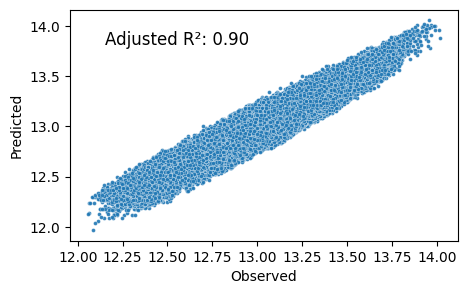

<ipython-input-15-3795e6013a91>:48: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resids_studentized, norm_hist=True, hist_kws=dict(edgecolor='w'))


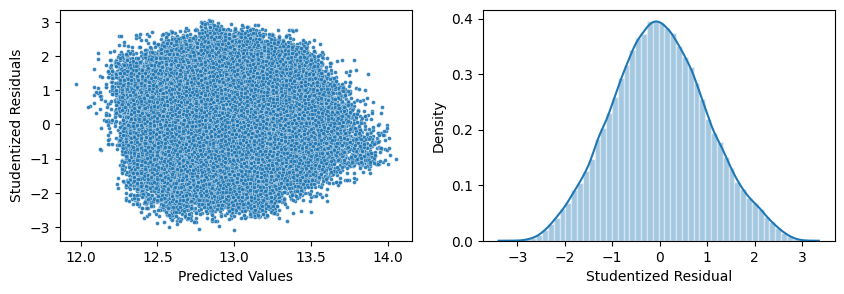

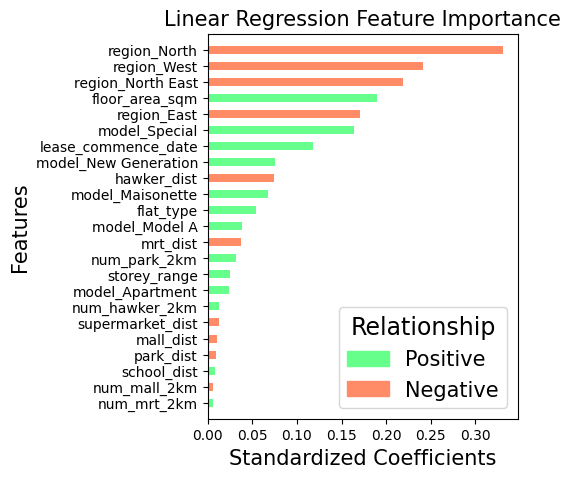

Feature Importance:
                  Feature  Feature_Importance
0            num_mrt_2km              0.0060
1           num_mall_2km              0.0065
2            school_dist              0.0085
3              park_dist              0.0098
4              mall_dist              0.0103
5       supermarket_dist              0.0123
6         num_hawker_2km              0.0126
7        model_Apartment              0.0234
8           storey_range              0.0255
9           num_park_2km              0.0317
10              mrt_dist              0.0377
11         model_Model A              0.0383
12             flat_type              0.0543
13      model_Maisonette              0.0680
14           hawker_dist              0.0743
15  model_New Generation              0.0750
16   lease_commence_date              0.1184
17         model_Special              0.1643
18           region_East              0.1704
19        floor_area_sqm              0.1901
20     region_North East          

In [ ]:
from sklearn.linear_model import LinearRegression

# sklearn method, which doesn't give much additional info

lin_reg = LinearRegression()
lin_reg.fit(lr_X, np.log(lr_y))

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(lr_X, np.log(lr_y))}')


import statsmodels.api as sm


X_constant = sm.add_constant(lr_X)
lin_reg = sm.OLS(np.log(lr_y),X_constant).fit()
lin_reg.summary()

# scatterplot of y (observed) and yhat (predicted)

plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x=np.log(lr_y)['real_price'], y=lin_reg.predict(), edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')#, ax.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_xticks()/1000])
ax.set_ylabel('Predicted')#, ax.set_yticklabels(['{:,.0f}'.format(x) + 'K' for x in ax.get_yticks()/1000])
ax.annotate('Adjusted R\u00b2: ' + str(format(round(lin_reg.rsquared_adj,2),'.2f')), xy=(0, 1), xytext=(25, -25),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()



# Homoscedasticity and Normality of Residuals
pred = lin_reg.predict()
resids = lin_reg.resid
resids_studentized = lin_reg.get_influence().resid_studentized_internal

fig = plt.figure(figsize=(10,3))

ax1 = plt.subplot(121)
sns.scatterplot(x=pred, y=resids_studentized, edgecolors='w', alpha=0.9, s=8)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Studentized Residuals')

ax2 = plt.subplot(122)
sns.distplot(resids_studentized, norm_hist=True, hist_kws=dict(edgecolor='w'))
ax2.set_xlabel('Studentized Residual')

plt.show()



# Feature Importance

lr_results = pd.read_html(lin_reg.summary().tables[1].as_html(),header=0,index_col=0)[0]
coefs = lr_results[['coef']][1:].reset_index().rename(columns={'index':'feature'})
coefs['feature_importance'] = np.abs(coefs['coef'])
coefs = coefs.sort_values('feature_importance').reset_index(drop=True)
coefs['color'] = coefs['coef'].apply(lambda x: '#66ff8c' if x>0 else '#ff8c66')
coefs.plot.barh(x='feature',y='feature_importance',color=coefs['color'],figsize=(4,5))
colors = {'Positive':'#66ff8c', 'Negative':'#ff8c66'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, title='Relationship', fontsize = '15')
plt.setp(legend.get_title(),fontsize='17')
plt.xlabel('Standardized Coefficients', size=15), plt.ylabel('Features', size=15)
plt.ylim([-1,23])
plt.title('Linear Regression Feature Importance', size=15)
plt.show()



# Display Feature Importance in tabular form
feature_importance_table = pd.DataFrame({'Feature': coefs['feature'], 'Feature_Importance': coefs['feature_importance']})
print("Feature Importance:\n", feature_importance_table)

from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(lr_X, np.log(lr_y))

predictions = lin_reg.predict(lr_X)

# Calculate MSE
mse = mean_squared_error(np.log(lr_y), predictions)
print(f'Mean Squared Error (MSE): {mse}')

Best R^2 score: 0.9611943353348422
R^2 score: 0.9611943353348422
Mean Absolute Error: 0.04650708435525873


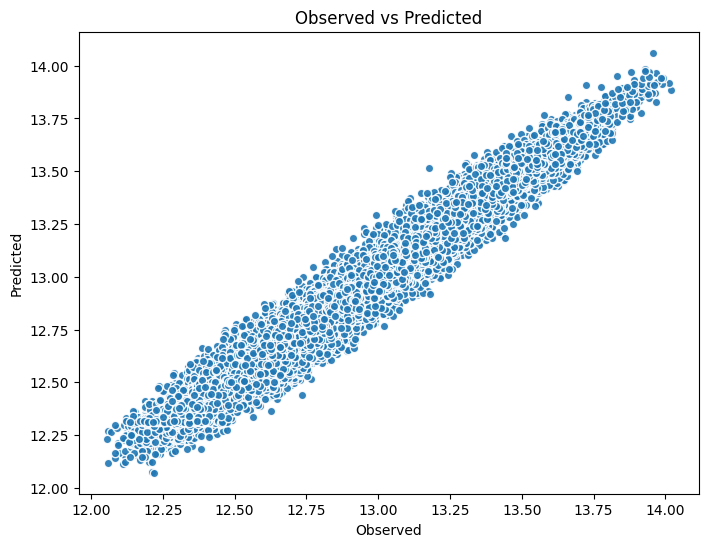

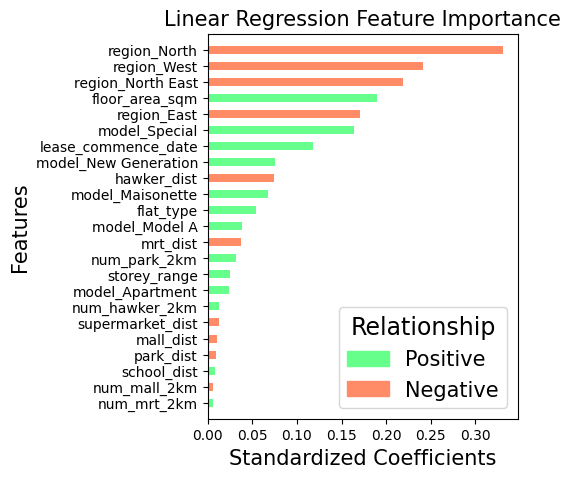

Feature Importance:
                  feature  feature_importance
0            num_mrt_2km              0.0060
1           num_mall_2km              0.0065
2            school_dist              0.0085
3              park_dist              0.0098
4              mall_dist              0.0103
5       supermarket_dist              0.0123
6         num_hawker_2km              0.0126
7        model_Apartment              0.0234
8           storey_range              0.0255
9           num_park_2km              0.0317
10              mrt_dist              0.0377
11         model_Model A              0.0383
12             flat_type              0.0543
13      model_Maisonette              0.0680
14           hawker_dist              0.0743
15  model_New Generation              0.0750
16   lease_commence_date              0.1184
17         model_Special              0.1643
18           region_East              0.1704
19        floor_area_sqm              0.1901
20     region_North East          

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to evaluate and visualize the model
def evaluate_model(model, X, y_true):
    # Predict
    y_pred = model.predict(X)
    # Calculate R^2 score
    r2 = r2_score(y_true, y_pred)
    # Calculate mean absolute error
    mae = mean_absolute_error(y_true, y_pred)
    print(f'R^2 score: {r2}')
    print(f'Mean Absolute Error: {mae}')
    # Visualize results
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, edgecolors='w', alpha=0.9)
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title('Observed vs Predicted')
    plt.show()

# Create a pipeline with PolynomialFeatures and Ridge regression
poly_degrees = [1, 2, 3]  # Try different degrees of polynomial features
alphas = [0.01, 0.1, 1.0]  # Try different regularization strengths
best_r2 = -float('inf')
best_model = None

for degree in poly_degrees:
    for alpha in alphas:
        # Create polynomial regression model
        poly_model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=alpha))
        poly_model.fit(lr_X, np.log(lr_y))
        # Evaluate the model
        predicted = poly_model.predict(lr_X)
        r2 = r2_score(np.log(lr_y), predicted)
        if r2 > best_r2:
            best_r2 = r2
            best_model = poly_model

# Evaluate and visualize the best model
print("Best R^2 score:", best_r2)
evaluate_model(best_model, lr_X, np.log(lr_y))
# Display Feature Importance graphically
coefs.plot.barh(x='feature', y='feature_importance', color=coefs['color'], figsize=(4, 5))
colors = {'Positive': '#66ff8c', 'Negative': '#ff8c66'}
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
legend = plt.legend(handles, labels, title='Relationship', fontsize='15')
plt.setp(legend.get_title(), fontsize='17')
plt.xlabel('Standardized Coefficients', size=15), plt.ylabel('Features', size=15)
plt.ylim([-1, 23])
plt.title('Linear Regression Feature Importance', size=15)
plt.show()

# Display Feature Importance in tabular form
print("Feature Importance:\n", coefs[['feature', 'feature_importance']])


Shapes - X_train: (91195, 26) X_test: (10133, 26) y_train: (91195,) y_test: (10133,)
XGBoost Train R^2: 0.9155952185952675
XGBoost Test R^2: 0.9113096388990017
XGBoost Train MAE: 30227.620018554233
XGBoost Test MAE: 30742.287674136125


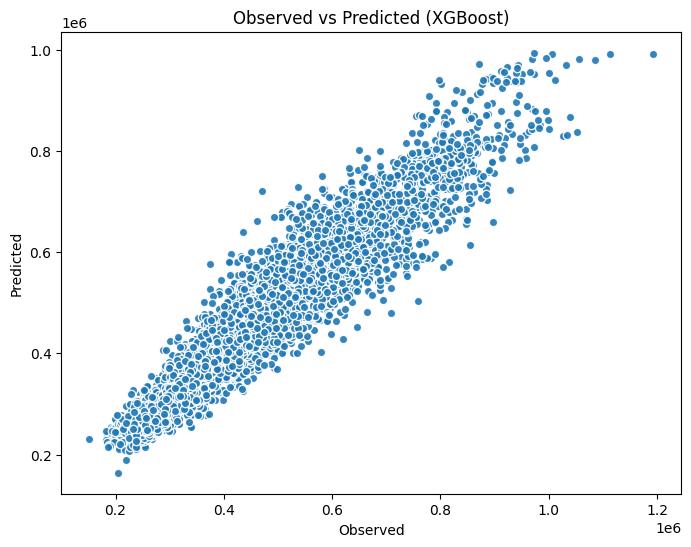

Results (XGBoost):
                 Metric         Value
0   Train R² (XGBoost)      0.915595
1    Test R² (XGBoost)      0.911310
2  Train MAE (XGBoost)  30227.620019
3   Test MAE (XGBoost)  30742.287674

Feature Importance (XGBoost):
                 Features  Feature Importance
0              flat_type            0.312477
16            dist_dhoby            0.202781
2         floor_area_sqm            0.137417
3    lease_commence_date            0.055157
1           storey_range            0.053941
6            hawker_dist            0.046682
25         model_Special            0.046269
18          region_North            0.020849
9           num_park_2km            0.017457
12              mrt_dist            0.015086
19     region_North East            0.013560
23         model_Model A            0.013422
17           region_East            0.011071
21       model_Apartment            0.010288
7         num_hawker_2km            0.007802
5         num_school_2km            0.00703

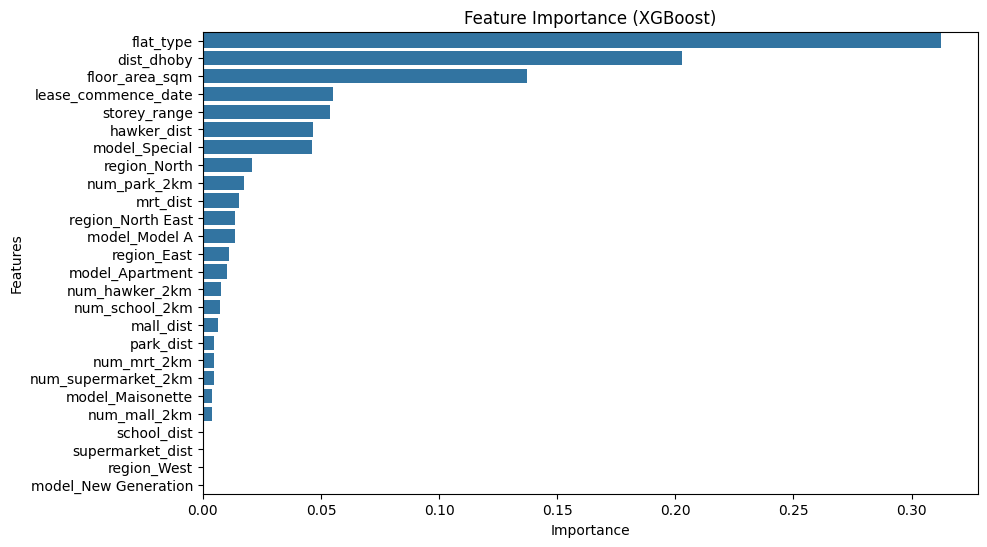

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import xgboost as xgb

# Train Test Split
X = df.drop(['real_price','town', 'year'], axis=1)
y = df['real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)
print('Shapes - X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape)

# Train the XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate the XGBoost model
y_train_pred_xgb = xgb_model.predict(X_train)
y_test_pred_xgb = xgb_model.predict(X_test)

train_r2_xgb = r2_score(y_train, y_train_pred_xgb)
test_r2_xgb = r2_score(y_test, y_test_pred_xgb)

train_mae_xgb = mean_absolute_error(y_train, y_train_pred_xgb)
test_mae_xgb = mean_absolute_error(y_test, y_test_pred_xgb)

print("XGBoost Train R^2:", train_r2_xgb)
print("XGBoost Test R^2:", test_r2_xgb)
print("XGBoost Train MAE:", train_mae_xgb)
print("XGBoost Test MAE:", test_mae_xgb)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_xgb, edgecolors='w', alpha=0.9)
plt.xlabel('Observed')
plt.ylabel('Predicted')
plt.title('Observed vs Predicted (XGBoost)')
plt.show()

# Display results in a table
results_xgb = pd.DataFrame({
    'Metric': ['Train R² (XGBoost)', 'Test R² (XGBoost)', 'Train MAE (XGBoost)', 'Test MAE (XGBoost)'],
    'Value': [train_r2_xgb, test_r2_xgb, train_mae_xgb, test_mae_xgb]
})
print("Results (XGBoost):\n", results_xgb)

# Feature Importance
feat_imp_xgb = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': xgb_model.feature_importances_}).sort_values('Feature Importance', ascending=False)

# Display feature importance in a table
print("\nFeature Importance (XGBoost):\n", feat_imp_xgb)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature Importance', y='Features', data=feat_imp_xgb)
plt.title('Feature Importance (XGBoost)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


Shapes - X_train: (91195, 26) X_test: (10133, 26) y_train: (91195,) y_test: (10133,)
Out-of-bag R² score estimate: 0.987
Test data R² score: 0.958
Test data Spearman correlation: 0.976
Test data Pearson correlation: 0.979
Test data Mean Absolute Error: 21317.527
Results:
                  Metric         Value
0         Out-of-bag R²      0.987102
1               Test R²      0.957675
2  Spearman correlation      0.976411
3   Pearson correlation      0.978629
4   Mean Absolute Error  21317.527193

Feature Importance:
                 Features  Feature Importance
2         floor_area_sqm            0.421306
16            dist_dhoby            0.276683
3    lease_commence_date            0.089074
0              flat_type            0.062977
6            hawker_dist            0.030236
1           storey_range            0.022749
12              mrt_dist            0.017570
10             mall_dist            0.012813
5         num_school_2km            0.008298
9           num_park_2km   

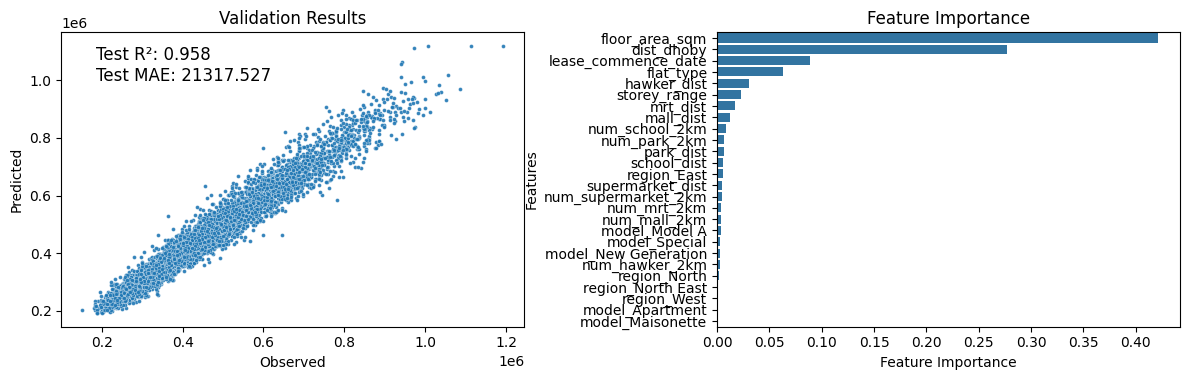

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Train Test Split
X = df.drop(['real_price','town', 'year'], axis=1)
y = df['real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)
print('Shapes - X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape)

# Train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Validation using out-of-bag method and evaluation on the test set
predicted_train = rf.predict(X_train)
oob_train_score = rf.score(X_train, y_train)
predicted_test = rf.predict(X_test)
test_score = rf.score(X_test, y_test)
spearman, _ = spearmanr(y_test, predicted_test)
pearson, _ = pearsonr(y_test, predicted_test)
mae = mean_absolute_error(y_test, predicted_test)

print(f'Out-of-bag R² score estimate: {oob_train_score:.3f}')
print(f'Test data R² score: {test_score:.3f}')
print(f'Test data Spearman correlation: {spearman:.3f}')
print(f'Test data Pearson correlation: {pearson:.3f}')
print(f'Test data Mean Absolute Error: {mae:.3f}')

# Display results in a table
results = pd.DataFrame({
    'Metric': ['Out-of-bag R²', 'Test R²', 'Spearman correlation', 'Pearson correlation', 'Mean Absolute Error'],
    'Value': [oob_train_score, test_score, spearman, pearson, mae]
})
print("Results:\n", results)

# Scatterplots of observed vs predicted prices and Feature Importance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 4))

# Scatterplot
sns.scatterplot(x=y_test, y=predicted_test, edgecolors='w', alpha=0.9, s=8, ax=ax1)
ax1.set_xlabel('Observed'), ax1.set_ylabel('Predicted')
ax1.annotate(f'Test R²: {test_score:.3f}\nTest MAE: {mae:.3f}', xy=(0, 1), xytext=(25, -35),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
ax1.set_title('Validation Results')

# Feature Importance
feat_imp = pd.DataFrame({'Features': X_train.columns, 'Feature Importance': rf.feature_importances_}).sort_values('Feature Importance', ascending=False)
sns.barplot(y='Features', x='Feature Importance', data=feat_imp, ax=ax2)
ax2.set_title('Feature Importance')

plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])

# Display feature importance in a table
print("\nFeature Importance:\n", feat_imp)

plt.show()
